# Waiter Tips Prediction

In [5]:
import pandas as pd
import numpy as np
import math
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
data = pd.read_csv("tip.csv")
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [6]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [7]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

In [8]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [9]:
figure = px.pie(data, 
             values='tip', 
             names='day',hole = 0.5)
figure.show()

In [10]:
figure = px.pie(data, 
             values='tip', 
             names='sex',hole = 0.5)
figure.show()

In [11]:
figure = px.pie(data, 
             values='tip', 
             names='smoker',hole = 0.5)
figure.show()

In [12]:
figure = px.pie(data, 
             values='tip', 
             names='time',hole = 0.5)
figure.show()

## Waiter Tips Prediction Model

In [13]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


In [14]:
def cost(X,y,w,b):
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m=X.shape[0] # 3,4->3
    cost=0.0
    for i in range(m):
        f_wb_i=np.dot(X[i],w)+b
        cost=cost+(f_wb_i-y[i])**2
    cost=cost/(2*m)
    return cost

In [15]:
def gradient(X,y,w,b):
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n=X.shape
    dj_dw=np.zeros(n)
    dj_db=0.0
    for i in range(m):
        err=(np.dot(X[i],w)+b)-y[i] #tích vô hướng 2 vecto,.. ->err
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err*X[i,j]
        dj_db=dj_db+err
    dj_db=dj_db/m
    dj_dw=dj_dw/m
    return dj_db, dj_dw
            
            
    

In [16]:
import copy

def gradient_descent(X,y,w_in,b_in, cost, gradient, alpha, iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
    """
    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in
    for i in range(iters):
        dj_db,dj_dw= gradient(X,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i<100000:
            J_history.append(cost(X,y,w,b))
        if i % math.ceil(iters/10)==0:
            print( f"iter {i:4d}: Cost {J_history[-1]}")
    return w,b,J_history

In [17]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma
# Dùng x_train_norm này để chạy Gradient Descent

In [18]:
x = np.array(data[["total_bill", "sex", "smoker", "day","time", "size"]])
initial_w=np.zeros(x.shape[1],dtype=float)
initial_b = 0.
iterations = 10000
alpha = 1e-3
y = np.array(data["tip"])
x_train_norm, mu, sigma = zscore_normalize_features(x)
w_final, b_final ,J_his=gradient_descent(x_train_norm,y,initial_w,initial_b,cost,gradient,alpha,iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train_norm.shape
y_pred = np.dot(x_train_norm, w_final) + b_final
for i in range(m):
    print(f"prediction: {y_pred[i]:0.2f}, target value: {y[i]}")

iter    0: Cost 5.4377524654223945
iter 1000: Cost 1.1501030702804496
iter 2000: Cost 0.5988148830655273
iter 3000: Cost 0.5220179776007133
iter 4000: Cost 0.5099746977923101
iter 5000: Cost 0.5074960651210109
iter 6000: Cost 0.5067322352276754
iter 7000: Cost 0.506409009056881
iter 8000: Cost 0.506249047263497
iter 9000: Cost 0.5061633968438901
b,w found by gradient descent: 3.00,[ 0.8274199  -0.01509648 -0.03557161  0.03710107 -0.0266122   0.17711685] 
prediction: 2.70, target value: 1.01
prediction: 2.24, target value: 1.66
prediction: 3.23, target value: 3.5
prediction: 3.30, target value: 3.31
prediction: 3.79, target value: 3.61
prediction: 3.82, target value: 4.71
prediction: 1.91, target value: 2.0
prediction: 3.97, target value: 3.12
prediction: 2.49, target value: 1.96
prediction: 2.47, target value: 3.23
prediction: 2.05, target value: 1.71
prediction: 4.78, target value: 5.0
prediction: 2.53, target value: 1.57
prediction: 3.18, target value: 3.0
prediction: 2.50, target va

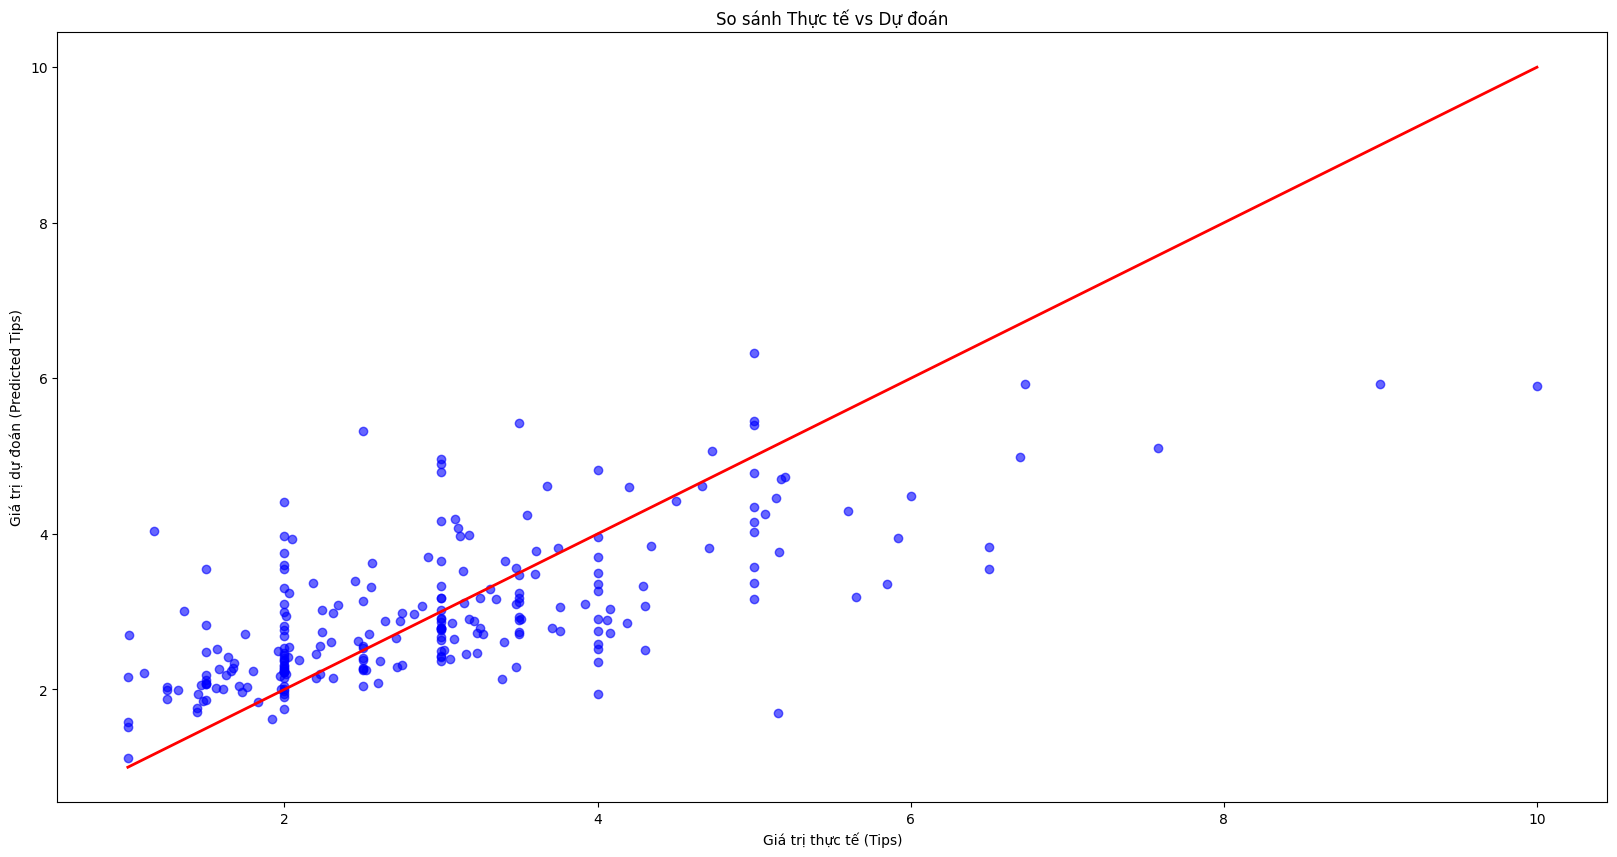

In [19]:
import matplotlib.pyplot as plt

# Tính toán lại toàn bộ dự đoán
predictions = np.dot(x_train_norm, w_final) + b_final

# Vẽ biểu đồ
plt.figure(figsize=(20, 10))
plt.scatter(y, predictions, alpha=0.6, color='blue')

# Vẽ đường chéo màu đỏ (Nếu dự đoán chuẩn 100% thì các điểm sẽ nằm trên đường này)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r-', lw=2)

plt.xlabel('Giá trị thực tế (Tips)')
plt.ylabel('Giá trị dự đoán (Predicted Tips)')
plt.title('So sánh Thực tế vs Dự đoán')
plt.show()

------------------------------
Mean Squared Error (MSE): 1.0122
R-squared Score: 0.4691


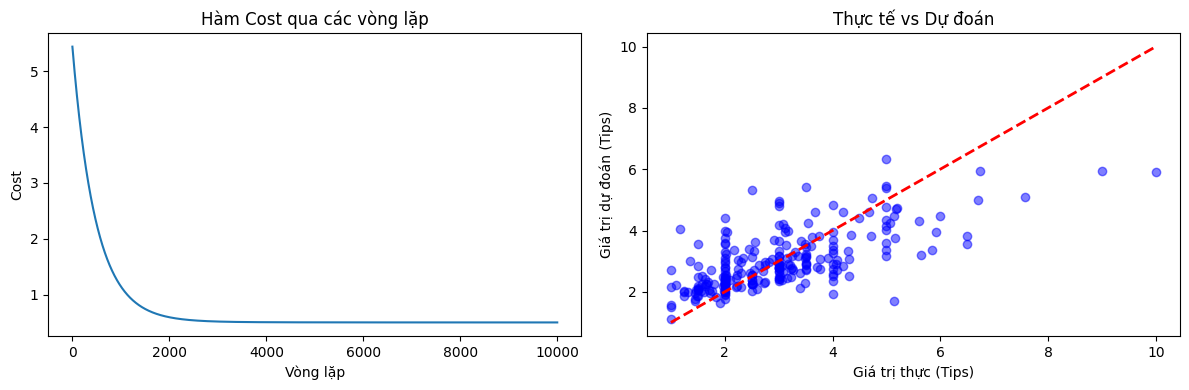

In [20]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print("-" * 30)
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score: {r2:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(J_his)
plt.title("Hàm Cost qua các vòng lặp")
plt.xlabel("Vòng lặp")
plt.ylabel("Cost")

plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2) # Đường chéo lý tưởng
plt.title("Thực tế vs Dự đoán")
plt.xlabel("Giá trị thực (Tips)")
plt.ylabel("Giá trị dự đoán (Tips)")

plt.tight_layout()
plt.show()